In [1]:
# importing the required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv
with open('Shopping_Revenue.csv') as file:
    df=pd.read_csv(file)

In [3]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,Ä°stanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,DiyarbakÄ±r,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [4]:
df.shape

(137, 43)

In [5]:
# checking for all the uniquevalues in different columns
for i in df.columns:
    print(i,df[i].nunique())

Id 137
Open Date 134
City 34
City Group 2
Type 3
P1 8
P2 8
P3 8
P4 6
P5 7
P6 8
P7 6
P8 8
P9 4
P10 4
P11 8
P12 7
P13 5
P14 10
P15 8
P16 9
P17 9
P18 7
P19 9
P20 9
P21 8
P22 5
P23 9
P24 9
P25 8
P26 10
P27 9
P28 9
P29 7
P30 9
P31 10
P32 10
P33 6
P34 8
P35 8
P36 8
P37 8
revenue 137


In [6]:
#drop the columns that are not necessary
df.drop(['Id','Open Date','City'],axis=1,inplace=True)

In [7]:
df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,5.0,4,...,3.0,5,3,4,5,5,4,3,4,5653753
1,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,5.0,5,...,3.0,0,0,0,0,0,0,0,0,6923131
2,Other,IL,2,4.0,2.0,5.0,2,3.0,5.0,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,Other,IL,6,4.5,6.0,6.0,4,4.0,10.0,8,...,7.5,25,12,10,6,18,12,12,6,2675511
4,Other,IL,3,4.0,3.0,4.0,2,2.0,5.0,5,...,3.0,5,1,3,2,3,4,3,3,4316715


In [8]:
df['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [9]:
# encoding the type column
df['City Group'] = df['City Group'].map({'Big Cities':0,'Other':1})
df['Type'] = df['Type'].map({'IL':0, 'FC':1, 'DT':2})

In [10]:
df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,0,4,5.0,4.0,4.0,2,2.0,5.0,4,...,3.0,5,3,4,5,5,4,3,4,5653753
1,0,1,4,5.0,4.0,4.0,1,2.0,5.0,5,...,3.0,0,0,0,0,0,0,0,0,6923131
2,1,0,2,4.0,2.0,5.0,2,3.0,5.0,5,...,3.0,0,0,0,0,0,0,0,0,2055379
3,1,0,6,4.5,6.0,6.0,4,4.0,10.0,8,...,7.5,25,12,10,6,18,12,12,6,2675511
4,1,0,3,4.0,3.0,4.0,2,2.0,5.0,5,...,3.0,5,1,3,2,3,4,3,3,4316715


In [11]:
#getting the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City Group  137 non-null    int64  
 1   Type        137 non-null    int64  
 2   P1          137 non-null    int64  
 3   P2          137 non-null    float64
 4   P3          137 non-null    float64
 5   P4          137 non-null    float64
 6   P5          137 non-null    int64  
 7   P6          133 non-null    float64
 8   P7          133 non-null    float64
 9   P8          137 non-null    int64  
 10  P9          137 non-null    int64  
 11  P10         137 non-null    int64  
 12  P11         137 non-null    int64  
 13  P12         137 non-null    int64  
 14  P13         137 non-null    float64
 15  P14         137 non-null    int64  
 16  P15         137 non-null    int64  
 17  P16         137 non-null    int64  
 18  P17         137 non-null    int64  
 19  P18         137 non-null    i

In [12]:
#checking for null values
df.isnull().sum()

City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [13]:
# Since there are very little number of null values we can drop them
df.dropna(inplace=True)

In [14]:
df.describe()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,0.415385,0.569231,3.946154,4.407692,4.311538,4.376923,1.992308,3.346154,5.369231,5.130769,...,3.100000,2.800000,1.923077,2.492308,1.169231,2.500000,2.076923,2.169231,1.115385,4.482749e+06
std,0.494695,0.512457,2.801748,1.480866,1.031040,1.007840,1.223137,2.089885,2.286253,1.831628,...,1.671002,5.651919,3.395426,5.120632,1.725946,5.212165,3.494437,4.073241,1.789871,2.634010e+06
min,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,0.000000,0.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,...,2.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.963832e+06
50%,0.000000,1.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.969426e+06
75%,1.000000,1.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.256318e+06
max,1.000000,2.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [15]:
for i in df.columns:
    print(np.var(df[i]))

0.24284023668639046
0.26059171597633135
7.7894082840236685
2.176094674556213
1.0548668639053254
1.00792899408284
1.4845562130177514
4.334023668639053
5.186745562130178
3.32905325443787
3.178461538461539
3.231715976331361
3.720059171597633
3.585562130177515
1.0240236686390531
7.677869822485207
5.272485207100591
11.326863905325443
4.175443786982249
10.44023668639053
29.385562130177515
13.234082840236686
4.246390532544379
1.5200591715976333
19.467514792899404
5.14059171597633
4.288994082840237
6.493032544378698
4.290961538461539
5.195636094674557
2.7707692307692313
31.698461538461533
11.44023668639053
26.01917159763314
2.9559763313609464
26.95769230769231
12.11715976331361
16.463668639053253
3.178994082840237
6884636848067.837


In [16]:
# checking the correlation between different features
df.corr()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
City Group,1.000000,0.069154,-0.224236,-0.391687,-0.042906,-0.129888,0.030945,-0.402590,-0.170930,-0.026192,...,0.071270,-0.114228,-0.179278,-0.145618,-0.092049,-0.099213,-0.121766,-0.115946,-0.080815,-0.237082
Type,0.069154,1.000000,-0.156658,-0.103878,-0.220864,-0.013393,0.007040,-0.098551,-0.187400,-0.088178,...,-0.062463,-0.541176,-0.611721,-0.527108,-0.705742,-0.516601,-0.643672,-0.573861,-0.629958,0.104511
P1,-0.224236,-0.156658,1.000000,0.826486,0.682100,0.659252,0.289423,0.748570,0.846637,0.743078,...,0.558331,0.518224,0.459961,0.544892,0.349766,0.582596,0.483412,0.551691,0.276405,0.076455
P2,-0.391687,-0.103878,0.826486,1.000000,0.446730,0.503939,0.185775,0.665408,0.763442,0.468905,...,0.282569,0.349265,0.323876,0.366905,0.233632,0.386165,0.323457,0.367593,0.142970,0.196917
P3,-0.042906,-0.220864,0.682100,0.446730,1.000000,0.419514,0.161736,0.559357,0.636495,0.674032,...,0.556580,0.483020,0.392190,0.453791,0.316461,0.500188,0.440826,0.480189,0.280714,-0.027988
P4,-0.129888,-0.013393,0.659252,0.503939,0.419514,1.000000,0.725542,0.589007,0.692734,0.640787,...,0.428540,0.393025,0.309822,0.428661,0.176956,0.428693,0.281149,0.399774,0.164785,0.031850
P5,0.030945,0.007040,0.289423,0.185775,0.161736,0.725542,1.000000,0.349797,0.441789,0.457195,...,0.303802,0.255442,0.128649,0.235770,0.081406,0.257174,0.185134,0.213428,0.042899,-0.031083
P6,-0.402590,-0.098551,0.748570,0.665408,0.559357,0.589007,0.349797,1.000000,0.740448,0.702950,...,0.542737,0.471212,0.427644,0.479426,0.299554,0.504208,0.427285,0.490276,0.312529,0.154219
P7,-0.170930,-0.187400,0.846637,0.763442,0.636495,0.692734,0.441789,0.740448,1.000000,0.738108,...,0.562474,0.527686,0.441074,0.525999,0.353374,0.567263,0.479630,0.542640,0.311551,0.055930
P8,-0.026192,-0.088178,0.743078,0.468905,0.674032,0.640787,0.457195,0.702950,0.738108,1.000000,...,0.742862,0.469061,0.383047,0.492296,0.260229,0.518461,0.423528,0.479126,0.302755,-0.084394


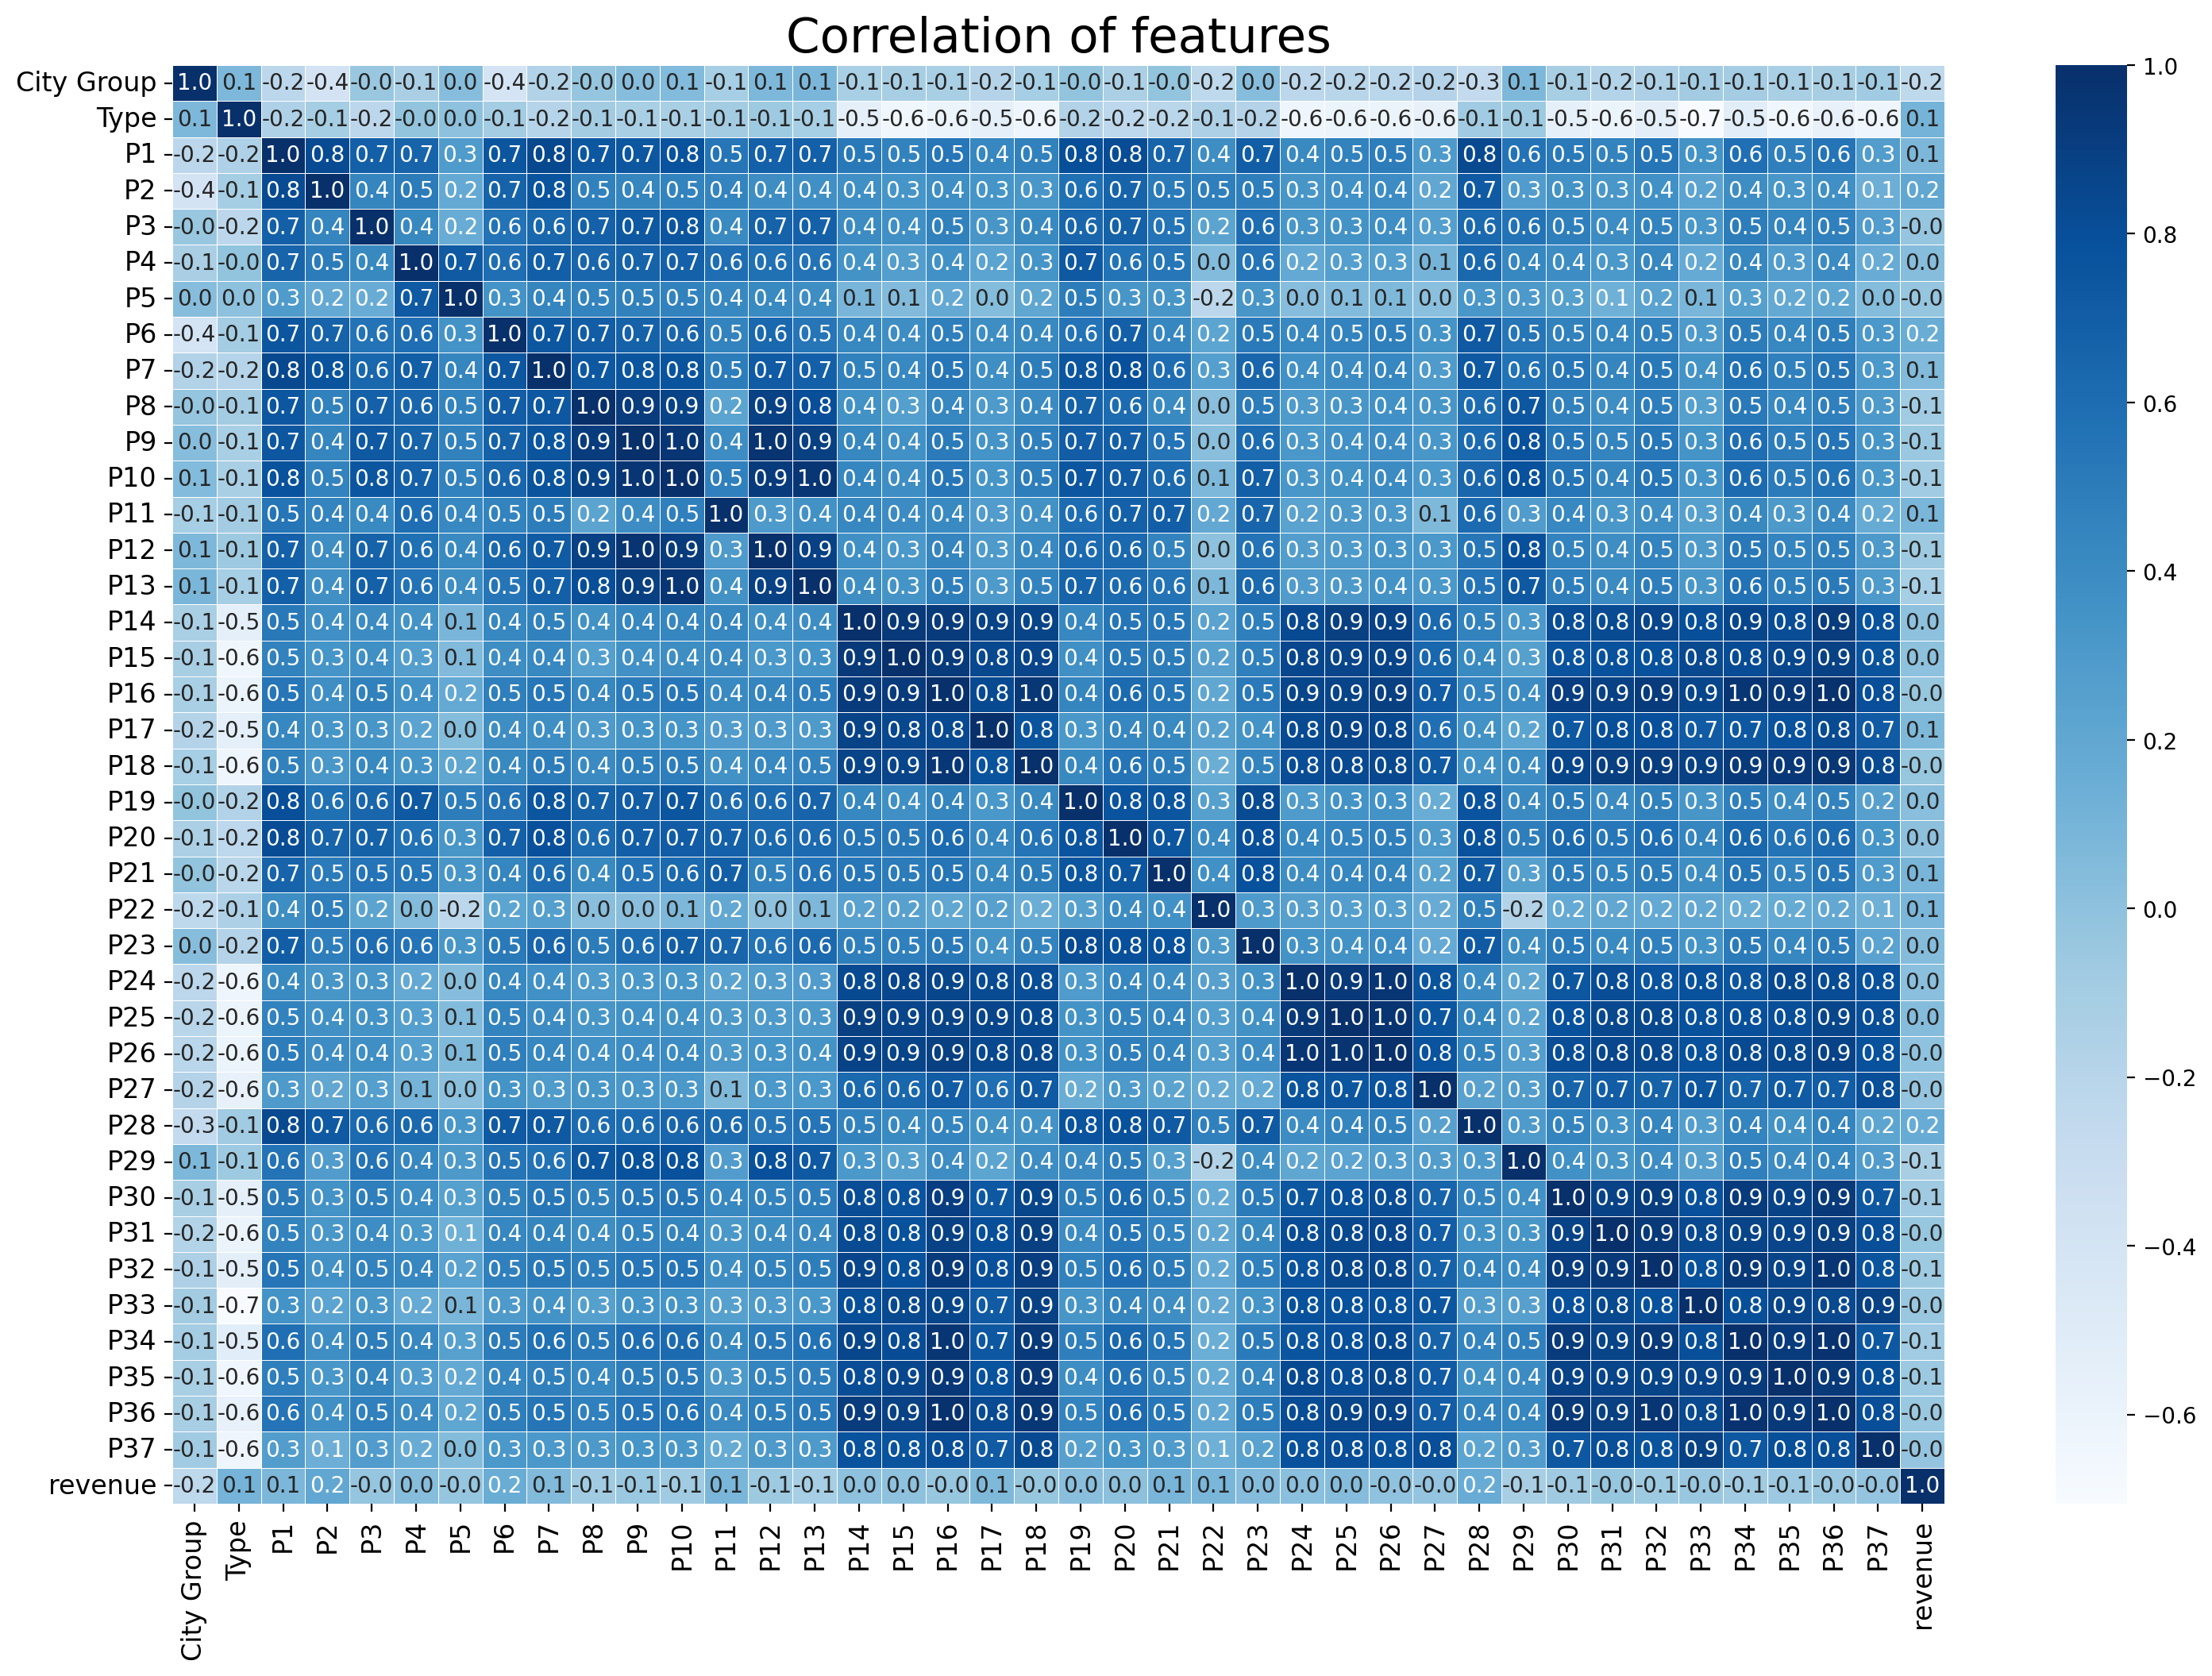

In [17]:
# checking via plot the correlation
plt.figure(figsize=(18,12), dpi= 200)
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=0.2,cmap='Blues')

# decoration
plt.title('Correlation of features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

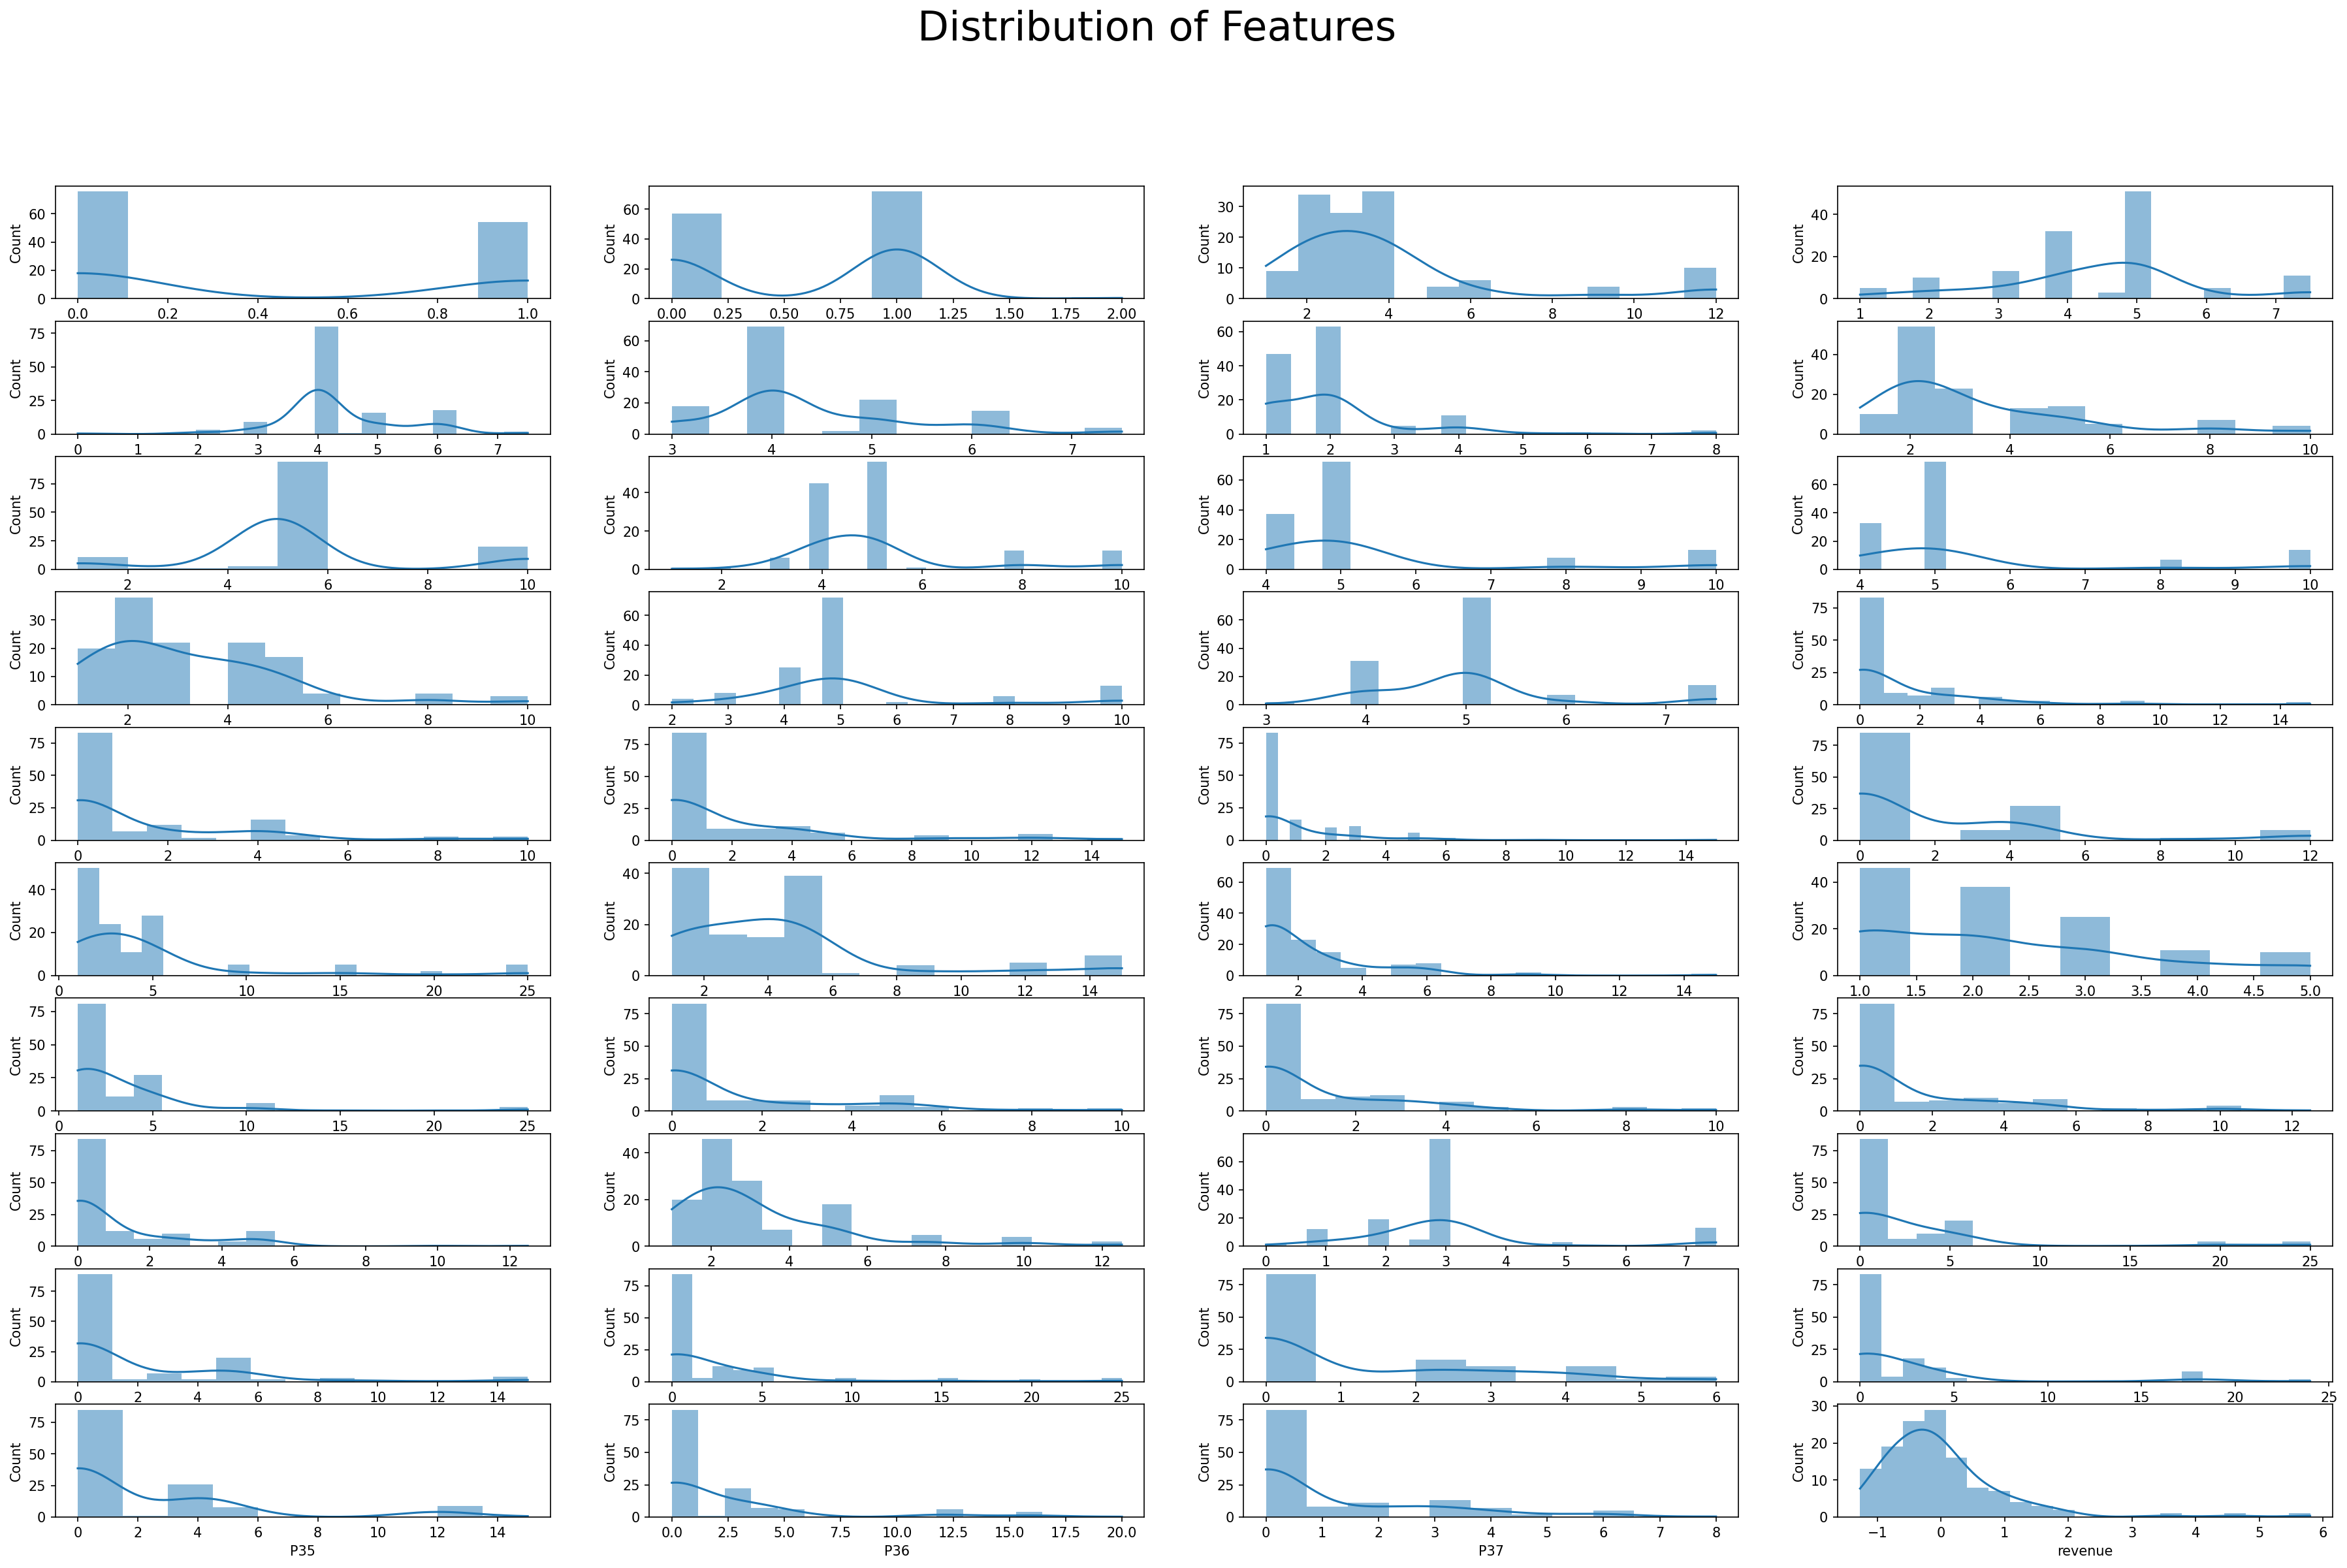

In [51]:
plt.figure(figsize=(30,18),dpi=150)
for i,j in enumerate(df.columns):
    plt.subplot(10,4,i+1)
    sns.histplot(df[j],linewidth=0,kde=True)
    
plt.suptitle("Distribution of Features",fontsize=30)
plt.show()

In [18]:
# scaling the features
from sklearn.preprocessing import StandardScaler
values = df.values
ss = StandardScaler()
y_scaled = ss.fit_transform(values[:,39].reshape(-1,1))

df['revenue'] = y_scaled

In [19]:
# splitting the data into features and target
x = df.drop('revenue',axis=1)
y = df['revenue']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)


In [21]:
# using the Recursive feature selection method for selecting important features
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, xtrain, ytrain, cv=cv)
# report performance
n_scores

array([-5.89092664e-01, -2.28923582e-01,  2.42481777e-01, -1.44102710e+01,
       -6.39673266e-01, -3.86983279e+01, -7.06154738e+00, -4.20209912e+00,
       -1.23111839e+00, -1.23862707e-01, -5.25485351e+00, -1.32986759e+00,
       -4.50195800e+00, -1.92620151e+01,  2.15725730e-01, -1.39731839e-01,
       -4.08723147e-01, -8.30010114e-02, -4.82085012e+00, -2.08205723e+00,
       -1.23833053e+00, -6.88671787e+00, -2.42885706e-02, -7.85103277e+00,
       -1.91019822e-01, -8.82378607e-01, -4.17550160e-01, -9.43263397e+00,
       -5.48021224e-01, -5.80072812e+00])

In [22]:
print(np.mean(n_scores))

-4.596082256651051


In [23]:
# evaluating the same model for different 
n_features = [10,13,15,18,22,25,28,32]
for i in n_features:
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
    model = DecisionTreeRegressor()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    # evaluate model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, xtrain, ytrain, cv=cv,scoring='r2')
    # report performance
    print(i,np.mean(n_scores),np.std(n_scores))

10 -4.0086003332012 5.956322496982106
13 -4.086905125871537 5.823585923578278
15 -4.978797889030717 8.30216708766915
18 -4.496511379043915 7.404004865666918
22 -4.411052049137998 7.220163938189258
25 -4.496937963412334 8.29914377248848
28 -4.699607897337655 7.597691343126515
32 -4.725751705727575 7.841304984836591


In [24]:
# so here we get n_features_to_select as 22
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(rfc, 22)
fs_xtrain = rfe.fit_transform(xtrain,ytrain)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True  True  True False  True False  True
  True  True False  True False False  True False  True  True  True  True
  True False  True False False  True  True False False False False False
 False  True False]
[ 1  8  1  1  1  1  1  1 13  1  4  1  1  1  2  1  5 10  1 11  1  1  1  1
  1 16  1  3 14  1  1 17 18 12  9  7 15  1  6]


In [25]:
# Now we will spot check the algorithms 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
models = []
models.append(('LR',LinearRegression()))
models.append(('knn',KNeighborsRegressor()))
models.append(('dt',DecisionTreeRegressor()))
models.append(('svm',SVR()))

In [27]:
for a,b in models:
    kfold = KFold(n_splits=3)
    results_a = cross_val_score(b,xtrain,ytrain,scoring='neg_mean_squared_error',cv=kfold)
    print(a,np.mean(results_a))

LR -4.4116253629415985
knn -1.0973523717369804
dt -2.7031117261742263
svm -1.1177509005627058


In [29]:
for name,model in models:
    kfold = KFold(n_splits=3)
    results_b = cross_val_score(model,fs_xtrain,ytrain,cv=kfold,scoring = 'neg_mean_squared_error')
    print(name,np.mean(results_b))

LR -2.488387272607516
knn -1.1614955556704134
dt -3.494136377455025
svm -1.1276140877681728


In [31]:
# the best among these is knn and svm
# now lets tune parameters using hyperparameter tuning
param = [1,3,5,7,9,11,13,15,17]
for i in param:
    pipeline_1 = []
    model = KNeighborsRegressor(n_neighbors=i)
#     rfe = RFE(model, n_features_to_select=28)
#     pipeline_1.append(('rfe',rfe))
#     pipeline_1.append(('knn',model))
    kfold = KFold(n_splits=10)
    results = cross_val_score(model,xtrain,ytrain,cv=kfold,scoring = 'neg_mean_squared_error')
    print(i,np.mean(results))

1 -2.380676087218803
3 -1.2303837276652014
5 -1.1727609193325592
7 -1.0905610703637412
9 -1.0893218029511533
11 -1.0394439084769886
13 -1.0197029484700744
15 -1.0288434656406977
17 -1.0493251570262054


In [33]:
# Now lets try ensemble models -: Bagging, Boosting, VotingClassifier
# lets try 3 ensembkle models 2 boosting and bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
ensemble = [('rfc',RandomForestRegressor()),('ab',AdaBoostRegressor()),('gb',GradientBoostingRegressor())]
for x,y in ensemble:
    kfold = KFold(n_splits=3)
    ensemble_result = cross_val_score(y,fs_xtrain,ytrain,cv=kfold,scoring = 'neg_mean_squared_error')
    print(x,np.mean(ensemble_result))

rfc -1.4188983030229607
ab -2.2494768733379
gb -1.7703416785661787


In [35]:
# tuning the parameter using gridsearchcv
from sklearn.model_selection import GridSearchCV
seed=7
scoring = 'neg_mean_squared_error'
param_grid = dict(n_estimators=np.array([50,75,100,125,150,200]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(xtrain, ytrain)

In [36]:
grid.best_score_

-1.5770074785018544

In [37]:
grid.cv_results_['params']

[{'n_estimators': 50},
 {'n_estimators': 75},
 {'n_estimators': 100},
 {'n_estimators': 125},
 {'n_estimators': 150},
 {'n_estimators': 200}]

In [38]:
grid.cv_results_['mean_test_score']

array([-1.57700748, -1.6714763 , -1.71008544, -1.75451816, -1.7712945 ,
       -1.79392853])

In [39]:
# lets try votingregressor on our best models which are svm knn and rfc
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('svm',SVR()),('knn',KNeighborsRegressor(n_neighbors=13))])
kfold = KFold(n_splits=3)
results_voting = cross_val_score(vr,fs_xtrain,ytrain,cv=kfold,scoring='neg_mean_squared_error')

In [40]:
print(np.mean(results_voting))

-1.0863800445848448


In [41]:
from sklearn.metrics import mean_squared_error
# predicting with best model 
vr = VotingRegressor([('svm',SVR()),('knn',KNeighborsRegressor(n_neighbors=13))])
vr.fit(xtrain,ytrain)
ypred = vr.predict(xtest)

In [42]:
mean_squared_error(ytest,ypred)

0.4330644414539397

In [48]:
# predicting with selected model
vr = VotingRegressor([('svm',SVR()),('knn',KNeighborsRegressor(n_neighbors=13))])
vr.fit(xtrain,ytrain)
ypred = vr.predict(xtest)

In [49]:
mean_squared_error(ytest,ypred)

0.4330644414539397